<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Reinforcement_Learning_CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Top-2 Finish on Continuous Action Games through Reinforcement Learning with Experience Replay
> Semant Jain, PhD  semant@gmail.com

### Introduction
The third paradigm of machine learning, after supervised and unsupervised learning, is reinforcement learning. Reinforcement learning finds a balance between exploring new unchartered territory and maximizing exploitation of current knowledge. The goal of a reinforcement learning agent is to choose actions that collect as much reward as possible. As immediate reward associated with an action can lead to future regret, the agent learns optimal behavior is to maximize future income which have involve negative immediate reward.

Use of domain knowledge can augment the reward through Reward Engineering or Reward Shaping. However, this approach has two limitations:
+ Information on how rewards can be shaped is not always available. 
+ Optimization of a performance improvement proxy could lead to unexpected and unwanted behavior.

Inspired from nature where positively rewarded behavior is stored, for large state-space, hindsight experience replay stores the agent's behavior. This replay speeds up the training.


### Applications
Applications such as robot control, elevator scheduling, telecommunications, and games such as backgammon, checkers, and AlphaGo, which involve long-term and short-term trade-offs are particularly well-suited for Reinforcement learning.


### Summary
To demonstrate reinforcement learning, a neural network was trained on the cart pole (inverted pendulum) game. Here, a pole was attached to a cart moving along a frictionless track. The goal was to prevent the cart from falling over. Each episode ended when the pole was more than 15 degrees from vertical, or the cart moved more than 2.4 units from the center.

With enough training time, reinforcement learning can be made to balance the cart for an infinite time. So, each episode was cut off after 500 steps. While random behavior can only balance the cart for a few dozen steps, after just 33 episodes, reinforcement behavior was able to balance the cart for the entire 500 steps (100% accuracy) for some episodes. This performance would be a top-2 performance on the game's leaderboard.


### Table of Contents
+ Setting Up
  + Importing libraries
  + Importing data
+ Model
  + Helper functions
  + Execution
  + Visualization


### Libraries used
+ Collections
+ Gym
+ Keras
+ Matplotlib
+ Numpy
+ Statistics

# 1. Setting up

### Importing libraries

In [2]:
from collections import deque

from statistics import mean, stdev

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

Using TensorFlow backend.


# 2. Model

### Helper functions: Agent

In [0]:
# Deep Q-learning Network Agent
class DQNAgent :
    def __init__ (self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen = 2000)

        # Hyperparameters
        self.gamma = 0.95
        self.epsilon = 1.0
        
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self.build_model()

        
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim = self.state_size, activation = 'relu' )) 
        model.add(Dense(24, activation = 'relu'))
        model.add(Dense(self.action_size, activation = 'linear'))
        model.compile(loss = "mse", 
                      optimizer = Adam(lr = self.learning_rate))
        return model
    
    def act(self, state):
        # Choosing action randomly for a fraction of the actions
        if np.random.rand() <= self.epsilon: 
            return random.randrange(self.action_size) 
        
        # Logical action
        act_values = self.model.predict(state)
        return np.argmax(act_values[0]) 
    
    # Experience replay
    # Variation: 
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done)) 
    
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        # Iterate over each experience, pass through model
        for (state, action, reward, next_state, done) in minibatch:
            target = reward 
            if not done: 
                q_values = self.gamma * self.model.predict(next_state)[0] 
                target  += self.gamma * np.max(q_values) 
            target_f = self.model.predict(state)
            target_f[0][action] = target 

            self.model.fit(state, target_f, epochs = 1, verbose = 0) 
            
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

### Execution

In [4]:
EPISODES = 200 

env = gym.make("CartPole-v1") 
state_size = env.observation_space.shape[0]
action_size = env.action_space.n # 0 and 1

agent = DQNAgent(state_size, action_size)

done = False
batch_size = 32 

list_time = []
list_epsi = []

for e in range(EPISODES):
    state = env.reset()
    state = state.reshape(1, state_size) 
    
    for time in range(500): 
        # env.render() # After every iteration
        
        action = agent.act(state) 
        next_state, reward, done, _ = env.step(action)
        
        reward = reward if not done else -10 
        
        next_state = next_state.reshape(1, state_size)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        
        if done or time ==499: 
            print(f"Ep: {e}/{EPISODES} Score: {time} Epsilon: {round(agent.epsilon,4)}")
            break 

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
        
    list_time.append(time)
    list_epsi.append(agent.epsilon)





Ep: 0/200 Score: 13 Epsilon: 1.0
Ep: 1/200 Score: 17 Epsilon: 1.0








Ep: 2/200 Score: 22 Epsilon: 0.0293
Ep: 3/200 Score: 11 Epsilon: 0.01
Ep: 4/200 Score: 8 Epsilon: 0.01
Ep: 5/200 Score: 14 Epsilon: 0.01
Ep: 6/200 Score: 150 Epsilon: 0.01
Ep: 7/200 Score: 91 Epsilon: 0.01
Ep: 8/200 Score: 88 Epsilon: 0.01
Ep: 9/200 Score: 119 Epsilon: 0.01
Ep: 10/200 Score: 76 Epsilon: 0.01
Ep: 11/200 Score: 93 Epsilon: 0.01
Ep: 12/200 Score: 117 Epsilon: 0.01
Ep: 13/200 Score: 172 Epsilon: 0.01
Ep: 14/200 Score: 205 Epsilon: 0.01
Ep: 15/200 Score: 190 Epsilon: 0.01
Ep: 16/200 Score: 194 Epsilon: 0.01
Ep: 17/200 Score: 195 Epsilon: 0.01
Ep: 18/200 Score: 207 Epsilon: 0.01
Ep: 19/200 Score: 179 Epsilon: 0.01
Ep: 20/200 Score: 183 Epsilon: 0.01
Ep: 21/200 Score: 269 Epsilon: 0.01
Ep: 22/200 Score: 132 Epsilon: 0.01
Ep: 23/200 Score: 336 Epsilon: 0.01
Ep: 24/200 Score: 144 Epsilon: 0.01
Ep: 25/200 Score: 31 Epsilon: 0.01
Ep: 26/200 Score: 173 Epsilon: 0.01
Ep: 27/200 Score: 160 Epsilon: 0.01
Ep

### Visualization

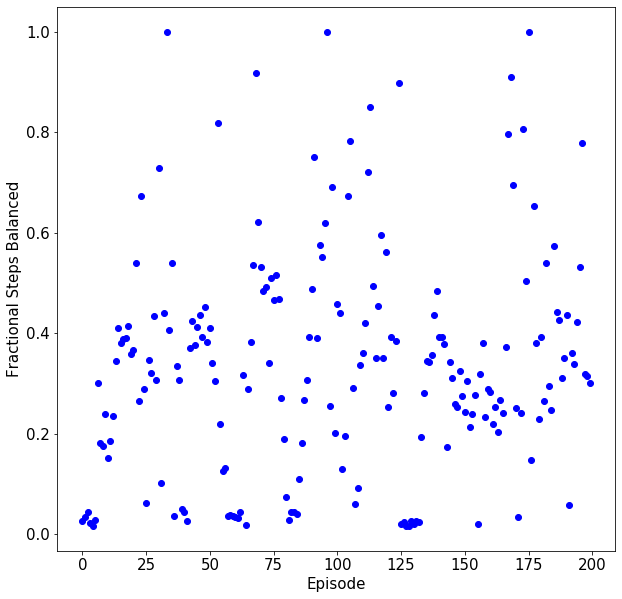

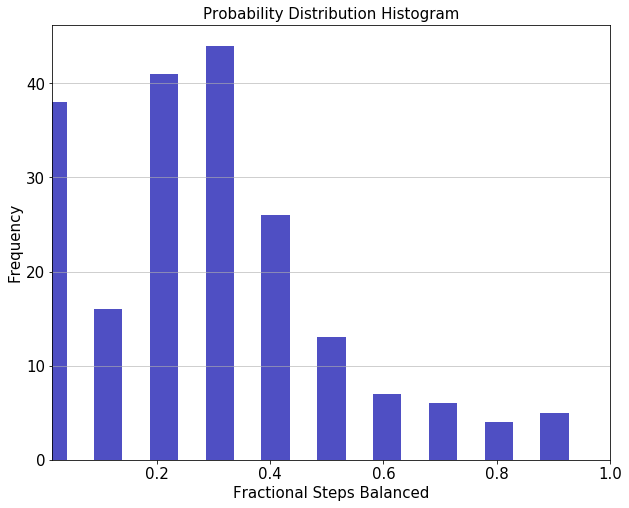

In [21]:
# BALANCING TIME PROGRESSION
list_time_frac = []

for i in range(len(list_time)):
    list_time_frac.append(list_time[i]/499.)
    #print(i, round(list_time_frac[i],4))

#print(list_time_frac)

plt.figure(figsize = (10,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Episode", fontsize = 15)
plt.ylabel("Fractional Steps Balanced", fontsize = 15)
plt.plot(list_time_frac, 'bo') #, linewidth = 0)
plt.savefig("ML_CE_Project_15_01_Fraction.jpeg")
plt.show()

# # RANDOMNESS VARIATION PROGRESSION
# plt.figure(figsize = (10,10))
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# #plt.xlim(0, 500)
# #plt.ylim(0, 500)
# plt.xlabel("Episode", fontsize = 15)
# plt.ylabel("Randomness Variation", fontsize = 15)
# plt.plot(list_epsi)
# plt.show()

# PROBABILITY DISTRIBUTION HISTOGRAM
hist,bin_edges = np.histogram(list_time_frac)
plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 0.05, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fractional Steps Balanced',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Probability Distribution Histogram',fontsize=15)
plt.savefig("ML_CE_Project_15_02_Histogram.jpeg")
plt.show()